<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/DataPreprocessing_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/healthcare_datasets.csv")
data.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Condition
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,84,Male,95,157,Hypertension
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,40,Male,163,285,NaN
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,72,Male,NAN,168,NaN
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,39,Male,118,288,Diabetes
4,044838d9-29a8-46da-8d74-18705c8df5d7,28,Female,128,229,Diabetes


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      3021 non-null   object
 1   Age             3021 non-null   object
 2   Gender          3021 non-null   object
 3   Blood_Pressure  3021 non-null   object
 4   Cholesterol     3021 non-null   object
 5   Condition       2027 non-null   object
dtypes: object(6)
memory usage: 141.7+ KB


In [ ]:
print(data.duplicated().sum())

20


In [ ]:
data=data.drop_duplicates()
print(data.duplicated().sum())


0


In [ ]:
data.isnull().sum()


,0
Patient_ID,0
Age,0
Gender,0
Blood_Pressure,0
Cholesterol,0
Condition,990


In [ ]:
data.isnull().mean()*100

,0
Patient_ID,0.000000
Age,0.000000
Gender,0.000000
Blood_Pressure,0.000000
Cholesterol,0.000000
Condition,32.989004


In [ ]:
data['Condition'] = data['Condition'].fillna(data['Condition'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data.isnull().mean()*100


,0
Patient_ID,0.0
Age,0.0
Gender,0.0
Blood_Pressure,0.0
Cholesterol,0.0
Condition,0.0


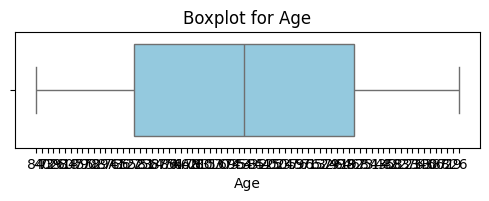

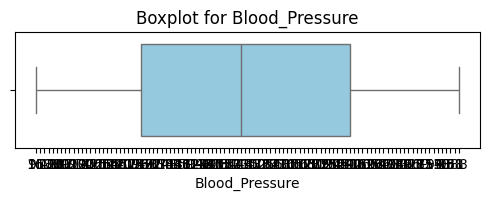

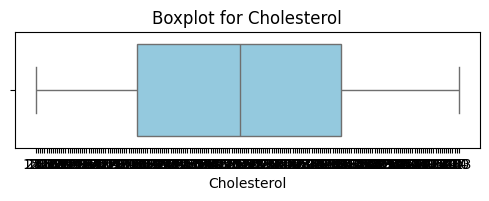

In [ ]:
numerical_cols = ['Age', 'Blood_Pressure', 'Cholesterol']

for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
data['Blood_Pressure'] = pd.to_numeric(data['Blood_Pressure'], errors='coerce')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

print(data.dtypes)

Patient_ID         object
Age               float64
Gender             object
Blood_Pressure    float64
Cholesterol       float64
Condition          object
dtype: object


In [ ]:
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    print(f"{column} Outlier limits: {lower:.2f} to {upper:.2f}")
    return data[(data[column] < lower) | (data[column] > upper)]
outliers_bp = find_outliers(data, 'Blood_Pressure')
outliers_chol = find_outliers(data, 'Cholesterol')
outliers_age = find_outliers(data, 'Age')
print(outliers_bp)
print(outliers_chol)
print(outliers_age)


Blood_Pressure Outlier limits: 29.50 to 233.50
Cholesterol Outlier limits: 0.50 to 396.50
Age Outlier limits: -18.00 to 126.00
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Blood_Pressure, Cholesterol, Condition]
Index: []
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Blood_Pressure, Cholesterol, Condition]
Index: []
Empty DataFrame
Columns: [Patient_ID, Age, Gender, Blood_Pressure, Cholesterol, Condition]
Index: []


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['Age', 'Blood_Pressure', 'Cholesterol']] = scaler.fit_transform(data[['Age', 'Blood_Pressure', 'Cholesterol']])
print(data[['Age', 'Blood_Pressure', 'Cholesterol']].describe())
data = pd.get_dummies(data, columns=['Gender', 'Condition'])


                Age  Blood_Pressure   Cholesterol
count  2.999000e+03    2.998000e+03  2.999000e+03
mean  -9.477062e-18   -9.361721e-17 -1.673294e-16
std    1.000167e+00    1.000167e+00  1.000167e+00
min   -1.717724e+00   -1.733952e+00 -1.685411e+00
25%   -8.601568e-01   -8.503754e-01 -8.386168e-01
50%   -2.589446e-03   -7.821472e-04 -6.094914e-02
75%    8.549779e-01    8.827948e-01  8.722521e-01
max    1.712545e+00    1.664421e+00  1.770890e+00


In [ ]:
data.head()

,Patient_ID,Age,Blood_Pressure,Cholesterol,Gender_Female,Gender_Male,Gender_NAN,Condition_Diabetes,Condition_Hypertension
0,0f5343ac-b858-4726-b8e6-d0e5a7cd73ff,1.426689,-1.224196,-0.700365,False,True,False,False,True
1,ff6cbae7-14d6-486d-a03b-c174dce2b9c0,-0.669586,1.086697,1.511668,False,True,False,True,False
2,cc32f20a-c701-4398-85cc-30cfe5e7a62a,0.854978,NaN,-0.510268,False,True,False,True,False
3,93c316b3-c2ff-42a9-9895-7ce3e3d6cd8a,-0.717229,-0.442571,1.563512,False,True,False,True,False
4,044838d9-29a8-46da-8d74-18705c8df5d7,-1.241298,-0.102733,0.543904,True,False,False,True,False
